# Practise Project: Insurance Cost Analysis
For the past 4 months I have been doing a course on Data Analytics. As one of the final assignments of the course we were tasked with performing analytics operations on an insurance database. In this Jupyter Notebook I want to take you along to show you how I solved the tasks I was given in this assignment. I'll demonstrate how I approached each challenge, extracting insights and conducting analyses.

### Database Parameters
The Insurance database parameters look as follows:
| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

### Objectives
The objectives of this assignment are:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.
 
 
## The Setup
I will be working with the following libraries:
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

And I will be downloading the provided dataset from the courses' own Skillnetwork.

In [1]:
# Importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset into this environment
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

## Task 01: Importing the Dataset
I will be importing the dataset using pandas. Then I'll load the first 10 rows to confirm it was successful.

In [3]:
df = pd.read_csv(filepath, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [4]:
# Adding headers to the dataset and replacing the "?" with "NaN".

headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

df.replace('?', np.nan, inplace = True)

# A quick check to see if there are no mistakes so far.
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


## Task 02: Data Wrangling
Now that the data has correctly been loaded into the environment it is time to clean it up. There are some data points with no info (NaN), so we have to check if we need to replace them or if we should remove them from the dataset.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [6]:
# Some columns have missing values: smokers and age. They also have the wrong datatype'object'. This should be 'int'

# We replace smoker with the most frequent entry, since it is a categorical entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# We replace age with the median, since it is a continuous entry
mean_age = df['age'].astype(float).mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update the datatypes and show the updated info
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [7]:
# Taking one final look at the data, we see that the columnn 'charges' has more than 2 decimals. Let's update this

df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


## Task 03: Exploratory Data Analysis (EDA)
Now the data is fully cleaned and we are ready to explore the dataset. We've been tasked with creating a regression plot for 'charges' to 'bmi' and a box plot for 'charges' to 'smoker'. After that we have to print the correlation matrix for the dataset.


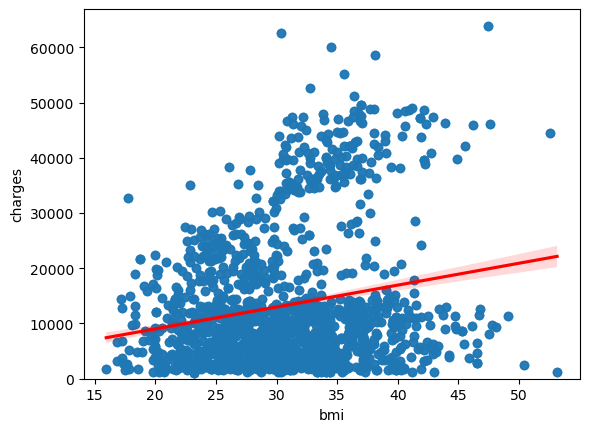

In [8]:
# Creating the regression plot for 'charges' to 'bmi'

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
plt.show()


<Axes: xlabel='smoker', ylabel='charges'>

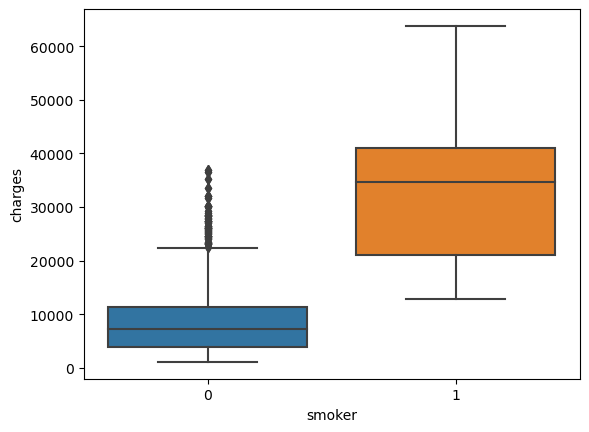

In [9]:
# Creating the box plot 'charges' to 'smoker'

sns.boxplot(x = "smoker", y = "charges", data = df)

In [10]:
# Printing the correlation matrix

print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


### Midpoint Summary
I want to take a quick look at the info we have so far before moving to the next step.

A correlation matrix shows a value between two attributes that varies between -1 to 1.
- A value of (or close to) -1 is considered a negative correlation. This means that as one variable increases, the other variable decreases.
- A value of (or close to) 1 is considerd a positive correlation. As one variable increases, the other varialbe also increases.
- A value of (or close to) 0 indicates there is a weak correlation between two attributes. If the value is exactly 0 it means that the attributes have no correlation to each other at all.

The correlation between two attributes also depends on the context of the analysis. <B>Correlation is not the same as causation.</B> Let's look at 'umbrellas' and 'rain'. When it is raining outside, there is a high change of seeing more umbrellas outside. We could then say that those two attributes are correlated with each other. However brining an umbrella with you does not cause it to rain. Meaning there is probably a high correlation between the two attributes 'umbrella' and 'rain', but it does not imply a causation.

In the matrix above you can see that all the same values ('age' to 'age', 'gender' to 'gender', 'bmi' to 'bmi', etc) have a correlation of 1, which makes sense since they are the same attribute. We also see that 'charges' to 'smoker' has a high correlation of approximately 0.788783. This means we can say that charges and smoker have a positively correlation with each other, since the number is close to 1.
As mentioned above, we have to keep in mind that correlation does not imply causation. The high correlation between 'charges' and 'smoker' indicates a relationship between these two values. We can use these two values as imput for creating a simple Linear Regression Model.

## Task 04: Model Development
Now that we have a better understanding of the data, we are tasked with creating a linear Regression Model (LRM) to predict the 'charges' value by using only the 'smokers' attribute and to print the $ R^2 $ score. Then we have to create a LRM by using all the values instead of only 'smokers' to see if there is an improvement in the performance.
And at last we have to create a pipeline using StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the 'charges' value. Here we will also use all the other values of the dataset.

In [11]:
# Creating the LRM by defining the values X and Y, where X is the independent variable and Y is the dependent variable.

X = df[["smoker"]]
Y = df["charges"]

# Creating the LRM and adding the training data
lm = LinearRegression()
lm.fit(X, Y)

# Printing the R^2 score
print(lm.score(X,Y))


0.6221791733924185


In [12]:
# Creating the LRM using all the values

Z = df[['smoker', 'age', 'gender', 'bmi', 'no_of_children', 'region']]
lm1 = LinearRegression()
lm1.fit(Z, Y)
print(lm1.score(Z, Y))

0.7504083820289634


As you can see above the $ R^2 $ for the LRM where we use all the values is higher, thus we can say that using all the values performs better in comparison to using just the one value ('charges' to 'smoker'). The higher the $ R^2 $ the more accurate the model is. A negative $ R^2 $ is a sign of overfitting. 

In [13]:
# Creating the pipeline using using StandardScaler(), PolynomialFeatures() and LinearRegression()

Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8451254465318394


## Task 05: Model Refinement
As a final task we have to split the data into testing and training subjects, where we have to use 20% of the data for testing. After that we have to initialize a Ridge regressor that is using hyperparameter $ \alpha = 0.1 $ and print the $ R^2 $ score. And at last we have to apply a polynomial transformation to the training parameters with degree=2. We will use this transformed set to fit the regression model we created above, using the training subset and print the $ R^2 $ score for the testing subset.

In [14]:
# Splitting the data into testing and training subjects

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [15]:
# Initializing the Ridge regressor and printing the R^2 score

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582406


In [16]:
# Applying the polynomial transformation using the training parameters with degree=2

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608132


## Conclusion
And those were all the tasks for this practise project! We have done a small analysis on the data about insurance costs to different other attributes.
- We found out that the attribue 'charges' was most closesly correlated to 'smoker' with a positive correlation of approximately 0.788783. As mentioned before, this is not the same as causation. It simply indicates that there is a relationship between the two values.
- We used those two attributes to create a first LRM and calculated the $ R^2 $ score.
- Then we created a LRM where we included all the other values. We saw that this gave us a higher $ R^2 $ score. A higher $ R^2 $ indicates that the model is a better fit to the dataset.
- We reached the best $ R^2 $ score in the final step, where we applied a polynomial transformation to thew training parameters with a degree=2.

Based on that we could say the best approach to predict the value for 'charges' would be to use a polynomial transformation using the training parameters with the degree=2.